In [1]:
# crush the wall-street
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import mpl_finance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [2]:
start=dt.datetime(2000,1,1)
end=dt.datetime(2019,12,31)
df=web.DataReader('TSLA','yahoo',start,end)

In [3]:
df.to_csv('tsla.csv')

In [4]:
df.head()
df['100ma']=df['Adj Close'].rolling(window=100,min_periods=0).mean()
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,23.860000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,23.226666
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,22.220000
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,20.998000


C:\Users\rtut6\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


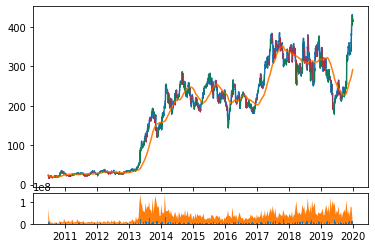

In [5]:
df_ohlc=df['Adj Close'].resample('10D').ohlc()
df_volume=df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)

ax1=plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2=plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)

plt.show()

In [49]:
import bs4 as bs
import datetime as dt
import os
import pandas_datareader.data as web
import pickle
import requests
from pathlib import Path
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.find_all('td')[0].text.replace('\n','')
        if "." in ticker:
            ticker = ticker.replace('.','-')
            print('ticker replaced to', ticker) 
        tickers.append(ticker)
#         ticker = row.findAll('td')[0].text
#         ticker = ticker[:-1]
#         tickers.append(ticker)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers

    
# save_sp500_tickers()

# save_sp500_tickers()
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2010, 1, 1)
    end = dt.datetime.now()
    k=0    
    for ticker in tickers[:50]:
        k=k+1
        print('1')
        # just in case your connection breaks, we'd like to save our progress!
#         if not os.path.exists('OLALAstock_dfs/{}.csv'.format(ticker)):
#             print('2')
        df = web.DataReader(ticker, 'yahoo', start, end)
#             df.reset_index(inplace=True)
#             df.set_index("Date", inplace=True)
#             df = df.drop("Symbol", axis=1)

        outname = str(ticker)+'.csv'
        outdir = Path(r'C:\Users\rtut6\Desktop\123')
#         if not os.path.exists('OLALAstock_dfs/{}.csv'.format(ticker)):
#         os.mkdir(outdir)
#         fullname = os.path.join(outdir, outname)    
#         df.to_csv(fullname.format(ticker))
        outdir.mkdir(parents=True, exist_ok=True)
        df.to_csv(outdir / outname.format(ticker)) 
#         df.to_csv('OLALAstock_dfs/{}.csv'.format(ticker))
#         else:
#             print('Already have1 {}'.format(ticker))



save_sp500_tickers()
get_data_from_yahoo()

ticker replaced to BRK-B
ticker replaced to BF-B
1
1
1
1


KeyboardInterrupt: 

In [50]:
import datetime as dt
import os
import pandas_datareader.data as web
import pickle
import requests
from pathlib import Path
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.find_all('td')[0].text.replace('\n','')
        if "." in ticker:
            ticker = ticker.replace('.','-')
            print('ticker replaced to', ticker) 
        tickers.append(ticker)
#         ticker = row.findAll('td')[0].text
#         ticker = ticker[:-1]
#         tickers.append(ticker)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers

    
# save_sp500_tickers()

# save_sp500_tickers()
def get_data_from_yahoo(reload_sp500=False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2010, 1, 1)
    end = dt.datetime.now()
    k=0
    for ticker in tickers[:500]:
        # just in case your connection breaks, we'd like to save our progress!
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'yahoo', start, end)
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
#             df = df.drop("Symbol", axis=1)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))
            
save_sp500_tickers()
get_data_from_yahoo()

ticker replaced to BRK-B
ticker replaced to BF-B
Already have MMM
Already have ABT
Already have ABBV
Already have ABMD
Already have ACN
Already have ATVI
Already have ADBE
Already have AMD
Already have AAP
Already have AES
Already have AFL
Already have A
Already have APD
Already have AKAM
Already have ALK
Already have ALB
Already have ARE
Already have ALXN
Already have ALGN
Already have ALLE
Already have AGN
Already have ADS
Already have LNT
Already have ALL
Already have GOOGL
Already have GOOG
Already have MO
Already have AMZN
Already have AMCR
Already have AEE
Already have AAL
Already have AEP
Already have AXP
Already have AIG
Already have AMT
Already have AWK
Already have AMP
Already have ABC
Already have AME
Already have AMGN
Already have APH
Already have ADI
Already have ANSS
Already have ANTM
Already have AON
Already have AOS
Already have APA
Already have AIV
Already have AAPL
Already have AMAT
Already have APTV
Already have ADM
Already have ARNC
Already have ANET
Already have AJ

In [20]:
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()
    try:
        for count, ticker in enumerate(tickers[:490]):
            df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
            df.set_index('Date', inplace=True)

            df.rename(columns={'Adj Close': ticker}, inplace=True)
            df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

            if main_df.empty:
                main_df = df
            else:
                main_df = main_df.join(df, how='outer')

            if count % 10 == 0:
                print(count)
        print(main_df.head())
        main_df.to_csv('sp500_joined_closes.csv')
    except:
        print('1')

compile_data()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
                  MMM        ABT  ABBV  ABMD        ACN       ATVI       ADBE  \
Date                                                                            
2009-12-31  63.824062  18.072063   NaN  8.73  33.412315  10.021834  36.779999   
2010-01-04  64.094299  18.229385   NaN  8.74  33.871223  10.193225  37.090000   
2010-01-05  63.692837  18.082108   NaN  8.53  34.080551  10.211267  37.700001   
2010-01-06  64.596115  18.182526   NaN  8.40  34.442860  10.157144  37.619999   
2010-01-07  64.642426  18.333153   NaN  8.40  34.410656   9.913588  36.889999   

             AMD        AAP        AES  ...        WMT        WBA        DIS  \
Date                                    ...                                    
2009-12-31  9.68  39.502171  10.494425  ...  41.701206  29.255346  28.090706   
2010-01

           MMM       ABT      ABBV      ABMD       ACN      ATVI      ADBE  \
MMM   1.000000  0.476671  0.352854  0.286598  0.533360  0.329983  0.445945   
ABT   0.476671  1.000000  0.431339  0.331687  0.478927  0.326842  0.423832   
ABBV  0.352854  0.431339  1.000000  0.223517  0.324994  0.214220  0.317268   
ABMD  0.286598  0.331687  0.223517  1.000000  0.285014  0.227415  0.305391   
ACN   0.533360  0.478927  0.324994  0.285014  1.000000  0.373050  0.481819   

           AMD       AAP       AES  ...       WMT       WBA       DIS  \
MMM   0.309395  0.253191  0.435520  ...  0.333044  0.367544  0.512544   
ABT   0.284080  0.264119  0.353520  ...  0.344398  0.343437  0.423287   
ABBV  0.159052  0.202807  0.212239  ...  0.200938  0.277775  0.271450   
ABMD  0.208118  0.137934  0.205017  ...  0.147530  0.186210  0.268042   
ACN   0.314761  0.251127  0.397494  ...  0.313930  0.314011  0.476672   

            WM       WAT       WEC       WFC      WELL       WDC        WU  
MMM   0.496172 

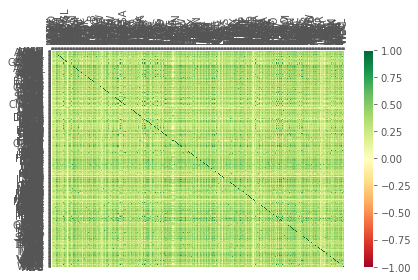

In [30]:
from matplotlib import style
style.use('ggplot')
def visualize_data(): 
    df = pd.read_csv('sp500_joined_closes.csv') 
    df.set_index('Date', inplace=True) 
    df_corr = df.pct_change().corr()
    print(df_corr.head())
    df_corr.to_csv('sp500corr.csv')
    data1 = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)

    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    column_labels = df_corr.columns
    row_labels = df_corr.index
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()

visualize_data()


In [ ]:
df['Adj Close'].plot()

In [64]:
from collections import Counter
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
from sklearn import svm, neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_closes.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
    for i in range(1, hm_days+1):
        df['{}_{}d'.format(ticker, i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
    df.fillna(0, inplace=True)
    return tickers, df


def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0


def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)

    df['{}_target'.format(ticker)] = list(map( buy_sell_hold,
                                               df['{}_1d'.format(ticker)],
                                               df['{}_2d'.format(ticker)],
                                               df['{}_3d'.format(ticker)],
                                               df['{}_4d'.format(ticker)],
                                               df['{}_5d'.format(ticker)],
                                               df['{}_6d'.format(ticker)],
                                               df['{}_7d'.format(ticker)]))

    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))

    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)

    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)

    X = df_vals.values
    y = df['{}_target'.format(ticker)].values
    return X, y, df


def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)
    print(len(X))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#     clf = VotingClassifier([('lsvc', svm.LinearSVC()),
#                             ('knn', neighbors.KNeighborsClassifier()),
#                             ('rfor', RandomForestClassifier())])
    clf=XGBClassifier(n_estimators=300)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:', confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:', Counter(predictions))
    print()
    print()
    return confidence


# examples of running:
#0.35 / 0.408
#0.46 / 0.455
#0.39 / 0.38

do_ml('XOM')
do_ml('AAPL')
do_ml('ABT')

Data spread: Counter({'0': 960, '1': 832, '-1': 745})
2537
accuracy: 0.4110236220472441
predicted class counts: Counter({0: 309, 1: 187, -1: 139})


Data spread: Counter({'1': 1194, '-1': 915, '0': 428})
2537
accuracy: 0.431496062992126
predicted class counts: Counter({1: 407, -1: 203, 0: 25})


Data spread: Counter({'1': 1000, '0': 831, '-1': 706})
2537
accuracy: 0.3826771653543307
predicted class counts: Counter({1: 310, 0: 204, -1: 121})




0.3826771653543307

In [58]:
X

NameError: name 'X' is not defined

Data spread: Counter({'0': 960, '1': 832, '-1': 745})


XGBoostError: Invalid Parameter format for max_depth expect int but value='[('lsvc', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')), ('rfor', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False))]'

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

In [48]:
process_data_for_labels(ticker)

NameError: name 'ticker' is not defined

In [52]:
tickers

NameError: name 'tickers' is not defined

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2)

NameError: name 'X' is not defined

In [25]:
main_df=pd.read_csv(r'sp500_joined_closes.csv')